### Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
# First two features for visualization purposes
X = iris.data[:, :2]
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [3]:
# Create a SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Train the SVM classifier
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [4]:
# Make predictions on the testing set
y_pred = svm.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7333333333333333


Confusion Matrix:
[[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]


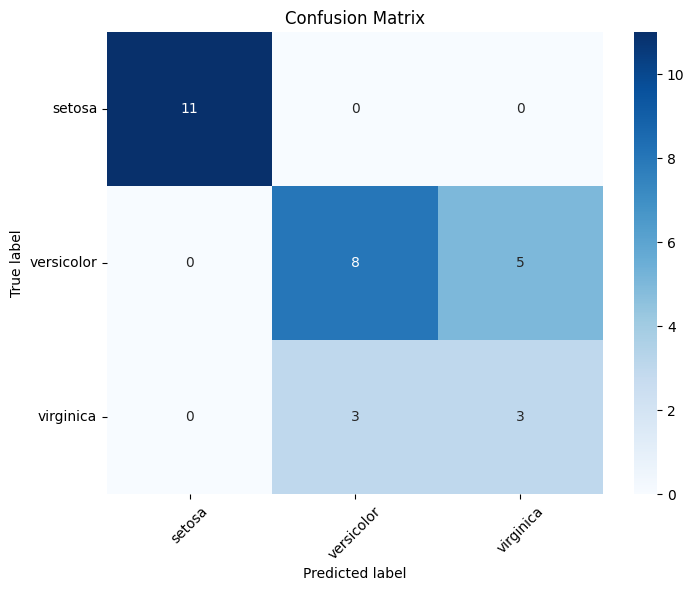

In [5]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, ax=ax)
ax.set_xticklabels(iris.target_names, rotation=45)
ax.set_yticklabels(iris.target_names, rotation=0)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'SVM Classification')

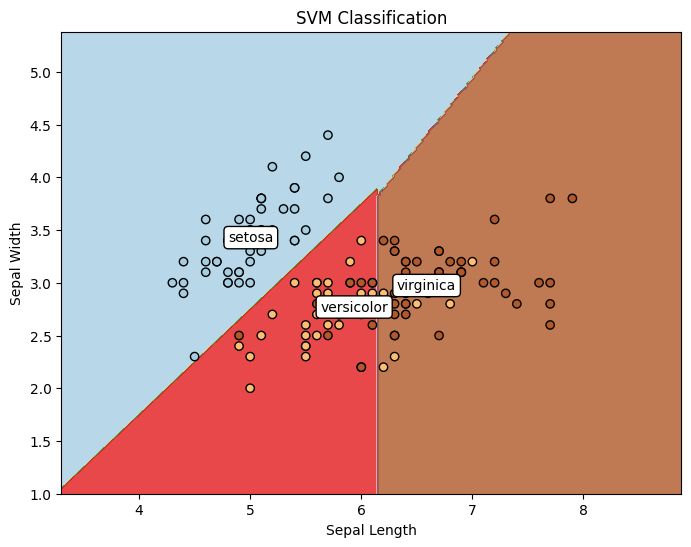

In [6]:
# Plot the decision boundary
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Make predictions on the meshgrid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(8, 6))

ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(
    X[:, 0], X[:, 1],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black',
)

# Add class labels
for i, label in enumerate(iris.target_names):
    ax.text(
        X[y == i, 0].mean(), X[y == i, 1].mean(),
        label,
        color='black',
        backgroundcolor='white',
        ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round')
    )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('SVM Classification')